In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

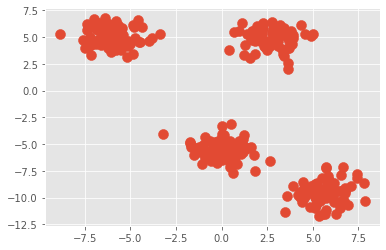

In [30]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=100)

In [31]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [32]:
import numpy as np
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 4, None, criteria, 10, flags)
# 函数参数：
# data:  需要分类数据，最好是np.float32的数据，每个特征放一列。
# K:  聚类个数 
# bestLabels：预设的分类标签或者None
# criteria：迭代停止的模式选择，这是一个含有三个元素的元组型数。格式为（type, max_iter, epsilon） 其中，type有如下模式：
# cv2.TERM_CRITERIA_EPS ：精确度（误差）满足epsilon，则停止。
# cv2.TERM_CRITERIA_MAX_ITER：迭代次数超过max_iter，则停止。
# cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER：两者结合，满足任意一个结束。
# attempts：重复试验kmeans算法次数，将会返回最好的一次结果
# flags：初始中心选择，可选以下两种：
# v2.KMEANS_PP_CENTERS：使用kmeans++算法的中心初始化算法，即初始中心的选择使眼色相差最大.详细可查阅kmeans++算法。(Use kmeans++ center initialization by Arthur and Vassilvitskii)
# cv2.KMEANS_RANDOM_CENTERS：每次随机选择初始中心（Select random initial centers in each attempt.）

In [33]:
compactness

526.6774351084605

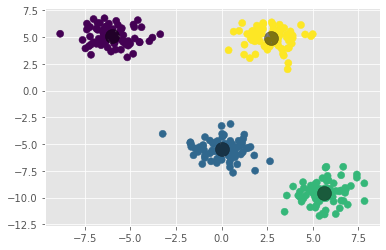

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [35]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=5):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

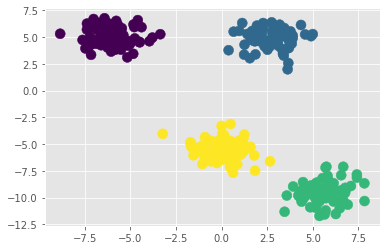

In [36]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

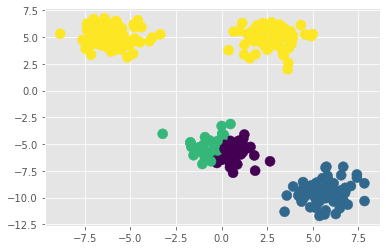

In [37]:
centers, labels = find_clusters(X, 4, rseed=10)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=12)

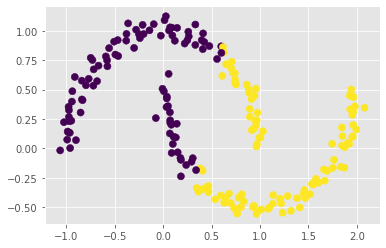

In [39]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 2, None, criteria, 10, flags)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

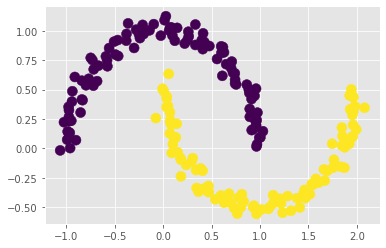

In [40]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

In [41]:
=

SyntaxError: invalid syntax (<ipython-input-41-9ae22869553b>, line 1)